In [1]:
# GENERAL PACKAGE IMPORT
# ----------------------
from db_interface import DB_Interface
import requests
import numpy as np
import json
import pandas as pd
from pandas import DataFrame
from io import StringIO

import datetime as dt
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import date2num
import seaborn
import timeit
import json
import pickle

import matplotlib.pyplot as plt
import datetime
import db_plotting

In [2]:
data22 = pd.read_csv('data22_revised.csv', parse_dates = True, index_col = 0)
data23 = pd.read_csv('data23_revised.csv', parse_dates = True, index_col = 0)

data22['datetime'] = pd.to_datetime(data22['datetime'])
data23['datetime'] = pd.to_datetime(data23['datetime'])

In [3]:
print(type(data22['datetime'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [4]:
data22['gta_window'] = 0
data23['gta_window'] = 0

gta_st = datetime.time(14,0,0)
gta_en = datetime.time(18,0,0)

data22['date'] = data22['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data22['time'] = data22['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

data23['date'] = data23['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data23['time'] = data23['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

gta_ts = (data22['time'] >= gta_st) & (data22['time'] <= gta_en)

data22['gta_window'][gta_ts] = 1
data23['gta_window'][gta_ts] = 1

#print(data22['gta_window'][gta_ts])

C:\Users\agarw\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\agarw\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [5]:
print(data22.columns)

Index(['desk1_6_light_power', 'desk1_plug_power', 'desk2_light_power',
       'desk2_plug_power', 'desk3_light_power', 'desk3_plug_power',
       'desk4_light_power', 'desk4_plug_power', 'desk5_light_power',
       'desk5_plug_power', 'desk6_plug_power', '1A-VAV1-Zn_Temp',
       '1A-VAV2-Zn_Temp', '1A-VAV3-Zn_Temp', '1A-VAV1-OccupiedCoolingSetpt',
       '1A-VAV1-OccupiedHeatingSetpt', '1A-VAV1-UnoccupiedCoolingSetpt',
       '1A-VAV1-UnoccupiedHeatingSetpt', '1A-VAV2-OccupiedCoolingSetpt',
       '1A-VAV2-OccupiedHeatingSetpt', '1A-VAV2-UnoccupiedCoolingSetpt',
       '1A-VAV2-UnoccupiedHeatingSetpt', '1A-VAV3-OccupiedCoolingSetpt',
       '1A-VAV3-OccupiedHeatingSetpt', '1A-VAV3-UnoccupiedCoolingSetpt',
       '1A-VAV3-UnoccupiedHeatingSetpt', '1A-El-AHU', '1A-El-CHWP',
       '1A-El-Exhaust Fan', '1A-El-HWP', '1A-Th-Chilled Water', '1B-OAT-1',
       'datetime', 'gta_window', 'date', 'time'],
      dtype='object')


### Metrics

In [6]:
data22 = data22.assign(COP='COP') 
#data22['COP'] = data22['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data22['COP'] = 2.9
data23 = data23.assign(COP='COP') 
#data23['COP'] = data23['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data23['COP'] = 2.9

In [7]:
data22 = data22.assign(chiller = 'Chiller_load') 
data22['Chiller_load'] = (data22['1A-Th-Chilled Water']/data22['COP'])*-1
data22['cooling_power [W]'] = data22['1A-El-AHU'] + data22['1A-El-Exhaust Fan'] + data22['1A-El-CHWP'] + data22['Chiller_load']

data23 = data23.assign(chiller = 'Chiller_load') 
data23['Chiller_load'] = (data23['1B-Th-Chilled Water']/data23['COP'])*-1
data23['cooling_power [W]'] = data23['1B-El-AHU'] + data23['1B-El-Exhaust Fan'] + data23['1B-El-CHWP'] + data23['Chiller_load']

In [8]:
en_1a = []
en_1b = []

# define dates for the calculation
for day in range(16,26):    
    mask_1 = data23['date'] == datetime.date(2021, 8, day)
    print(day)
    day_en_1a = round((data22['cooling_power [W]'][mask_1].sum()/4000),2)
    en_1a.append(day_en_1a)
      
    day_en_1b = round((data23['cooling_power [W]'][mask_1].sum()/4000),2)
    en_1b.append(day_en_1b)
    
for day in range(1,4):    
    mask_1 = data23['date'] == datetime.date(2021, 9, day)
    print(day)
    day_en_1a = round((data22['cooling_power [W]'][mask_1].sum()/4000),2)
    en_1a.append(day_en_1a)
      
    day_en_1b = round((data23['cooling_power [W]'][mask_1].sum()/4000),2)
    en_1b.append(day_en_1b)
print(en_1b)

16
17
18
19
20
21
22
23
24
25
1
2
3
[12.18, 10.65, 11.21, 14.67, 4.63, 3.9, 6.91, 4.32, 6.9, 8.0, 13.62, 6.75, 8.4]


In [9]:
test_day_mask = (((data23['date'] >= datetime.date(2021, 8, 16)) & (data23['date'] < datetime.date(2021, 8, 26))) |
                ((data23['date'] >= datetime.date(2021, 9, 1)) & (data23['date'] < datetime.date(2021, 9, 4))))

In [10]:
print(test_day_mask)

time
2021-08-15 23:45:00    False
2021-08-16 00:00:00     True
2021-08-16 00:15:00     True
2021-08-16 00:30:00     True
2021-08-16 00:45:00     True
                       ...  
2021-09-03 22:45:00     True
2021-09-03 23:00:00     True
2021-09-03 23:15:00     True
2021-09-03 23:30:00     True
2021-09-03 23:45:00     True
Name: date, Length: 1825, dtype: bool


In [11]:
data23 = data23[test_day_mask]
data22 = data22[test_day_mask]

C:\Users\agarw\Desktop\LBNL\BTUS - HIL\Test results\HIL-Sim-main_process\HIL-Sim-main\flexlab\db_layer\db_plotting.py:38: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(hspace = .2, wspace=.15)


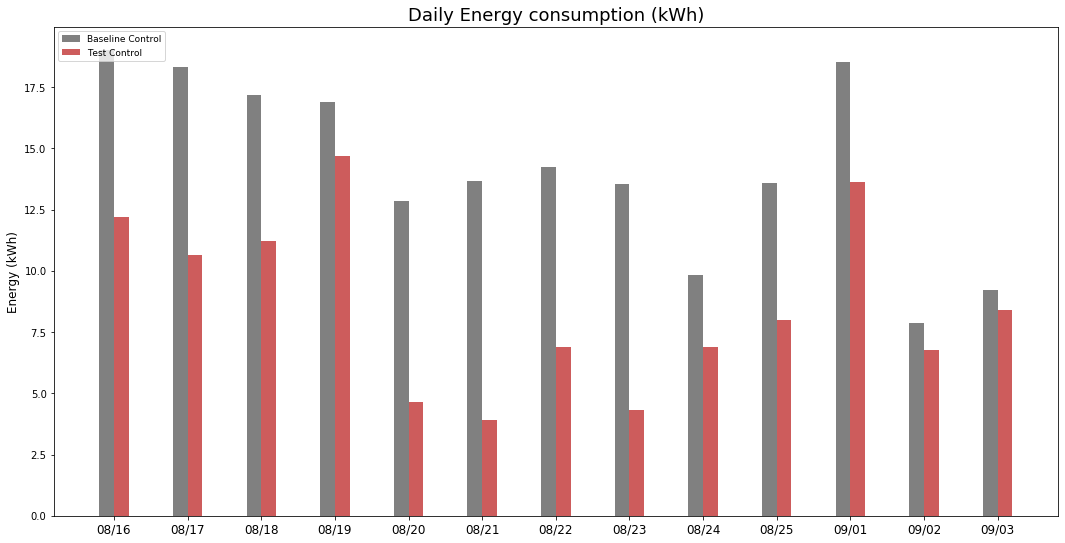

In [12]:
db_plotting.energy_plot(data23, en_1a, en_1b, 'Daily Energy consumption (kWh)', 'Energy (kWh)')

### Shed

In [13]:
data23['G36 Demand Shed'] = data23['cooling_power [W]'] - data22['cooling_power [W]']

shed_1a = []
shed_1b = []

# define dates for the calculation
for day in range(16,26):    
    mask_1 = data22['date'] == datetime.date(2021, 8, day)
    #print(day) 
    day_shed_1a = (data22['cooling_power [W]'][mask_1][gta_ts].mean())
    shed_1a.append(day_shed_1a)
    
    day_shed_1b = (data23['cooling_power [W]'][mask_1][gta_ts].mean())
    shed_1b.append(day_shed_1b)

for day in range(1, 4):    
    mask_1 = data22['date'] == datetime.date(2021, 9, day)
    #print(day) 
    day_shed_1a = (data22['cooling_power [W]'][mask_1][gta_ts].mean())
    shed_1a.append(day_shed_1a)
    
    day_shed_1b = (data23['cooling_power [W]'][mask_1][gta_ts].mean())
    shed_1b.append(day_shed_1b)
    #day_shed_1b = (data23['G36 Demand Shed'][mask_1][gta_ts].mean())
    #shed_1b.append(day_shed_1b)

In [14]:
print(data23['G36 Demand Shed'][gta_ts])

time
2021-08-16 14:00:00    -53.295010
2021-08-16 14:15:00   -309.276078
2021-08-16 14:30:00   -451.337569
2021-08-16 14:45:00   -401.927037
2021-08-16 15:00:00    210.751711
                          ...    
2021-09-03 17:00:00      9.981357
2021-09-03 17:15:00    -26.040189
2021-09-03 17:30:00    109.613279
2021-09-03 17:45:00    -20.179999
2021-09-03 18:00:00   -125.973779
Name: G36 Demand Shed, Length: 221, dtype: float64


In [16]:
def shed_demand_plot(data, list_1, list_2, title, y_label):
    fig, (ax) = plt.subplots(nrows = 1, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (18,9))
    fig.subplots_adjust(hspace = .2, wspace=.15)

    inp_day = data['date'].unique() # capture unique dates from the date column
    inp_day = inp_day.tolist() #convert to a list
    #print(inp_day)
    # create labels for each date of the test
    labels = []
    labels1 = []
    for i in range(0,len(inp_day)):
        labels.append(inp_day[i].strftime('%m/%d'))

    for i in range(0,len(inp_day)-1):
        labels1.append(inp_day[i].strftime('%m/%d'))

    x = np.arange(len(labels)-1)
    print(labels)
    print(list_2)
    width = .2

    ax.bar(x-width*.5, list_1, width = width, label='Baseline Control', color = 'dodgerblue')
    ax.bar(x+width*.5, list_2, width = width, label='Test Control', color = 'mediumseagreen')

    ax.set_xticks(range(len(labels)-1))
    ax.set_xticklabels(labels[1:len(labels)+1], fontsize = 12)
    ax.set_title(title, fontsize = 18)
    ax.set_ylabel(y_label, fontsize = 12)
    ax.legend(fontsize = 9, loc = 2)

[734.4191545959559, 675.2819088222528, 575.9486105315981, 643.4475998777966, 151.99988037743796, 149.85246858996587, 436.1053462460598, 156.8565186393063, 752.4404746733226, 929.4080943487888, 379.1325173711111, 721.5167610393678, 812.738813707273]
['08/16', '08/17', '08/18', '08/19', '08/20', '08/21', '08/22', '08/23', '08/24', '08/25', '09/01', '09/02', '09/03']
[734.4191545959559, 675.2819088222528, 575.9486105315981, 643.4475998777966, 151.99988037743796, 149.85246858996587, 436.1053462460598, 156.8565186393063, 752.4404746733226, 929.4080943487888, 379.1325173711111, 721.5167610393678, 812.738813707273]


C:\Users\agarw\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: shape mismatch: objects cannot be broadcast to a single shape

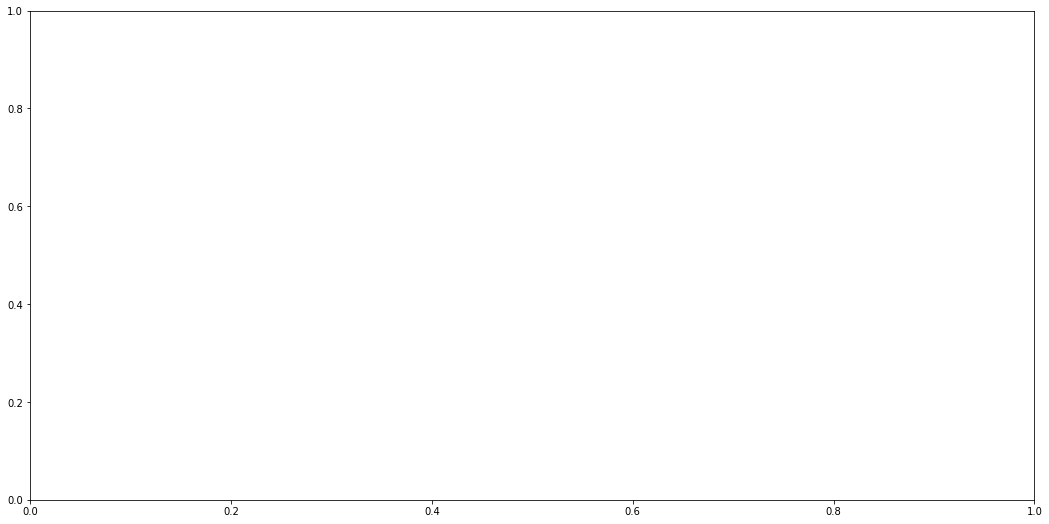

In [17]:
print(shed_1b)
shed_demand_plot(data23, shed_1a, shed_1b, 'Demand during GTA period', 'Demand (W)')

### Thermal comfort

In [15]:
data22 = data22.assign(nor_zat_deg = 'nor_zat_deg') 
#for i in range(len(data20.index)):

def zat_col(df_zat, df_cool_sp):
    df_zat = df_zat.apply(lambda x: (x-32)/1.8)
    df_cool_sp = df_cool_sp.apply(lambda x: (x-32)/1.8)
    
    df_zat_deg = df_zat - df_cool_sp
    df_zat_deg = df_zat_deg.apply(lambda x:0 if x <= 0 else x)
    return (df_zat_deg)

In [16]:
data22['nor_zat_deg'] = zat_col(data22['1A-VAV1-Zn_Temp'], data23['1B-VAV1-OccupiedCoolingSetpt'])
data22['cor_zat_deg'] = zat_col(data22['1A-VAV2-Zn_Temp'], data23['1B-VAV2-OccupiedCoolingSetpt'])
data22['sou_zat_deg'] = zat_col(data22['1A-VAV3-Zn_Temp'], data23['1B-VAV3-OccupiedCoolingSetpt'])

data23['nor_zat_deg'] = zat_col(data23['1B-VAV1-Zn_Temp'], data23['1B-VAV1-OccupiedCoolingSetpt'])
data23['cor_zat_deg'] = zat_col(data23['1B-VAV2-Zn_Temp'], data23['1B-VAV2-OccupiedCoolingSetpt'])
data23['sou_zat_deg'] = zat_col(data23['1B-VAV3-Zn_Temp'], data23['1B-VAV3-OccupiedCoolingSetpt'])

In [17]:
def calc_stats(df, df_temp):
   
    overshoot = []
    mean = []
    median = []
    std = []
    oc_st = datetime.time(7,0,0)
    oc_en = datetime.time(19,0,0)

    oc_time = ((df['time'] >= oc_st) & (df['time'] <= oc_en))
        
    for day in range(16, 26):    
        mask_1 = data22['date'] == datetime.date(2021, 8, day)
        daily_mean = df_temp[mask_1][oc_time].mean()
        daily_median = df_temp[mask_1][oc_time].median()
        #print('Variance', df[df[i] > target[i]].var())
        daily_std = df_temp[mask_1][oc_time].std()
        
        mean.append(daily_mean)
        median.append(daily_median)
        std.append(daily_std)
        
        daily_shoot = sum(df_temp[mask_1][oc_time]*.25)
        counter = sum(df_temp[mask_1][oc_time]>0)
        overshoot.append(daily_shoot)
        
    for day in range(1, 4):    
        mask_1 = data22['date'] == datetime.date(2021, 9, day)
        daily_mean = df_temp[mask_1][oc_time].mean()
        daily_median = df_temp[mask_1][oc_time].median()
        #print('Variance', df[df[i] > target[i]].var())
        daily_std = df_temp[mask_1][oc_time].std()
        
        mean.append(daily_mean)
        median.append(daily_median)
        std.append(daily_std)
        
        daily_shoot = sum(df_temp[mask_1][oc_time]*.25)
        counter = sum(df_temp[mask_1][oc_time]>0)
        overshoot.append(daily_shoot)
    return(overshoot, mean, median, std)

In [18]:
data22_nor_zat_deg, data22_nor_mean, data22_nor_median, data22_nor_std = calc_stats(data22, data22['nor_zat_deg'])
data22_cor_zat_deg, data22_cor_mean, data22_cor_median, data22_cor_std = calc_stats(data22, data22['cor_zat_deg'])
data22_sou_zat_deg, data22_sou_mean, data22_sou_median, data22_sou_std = calc_stats(data22, data22['sou_zat_deg'])

data23_nor_zat_deg, data23_nor_mean, data23_nor_median, data23_nor_std = calc_stats(data23, data23['nor_zat_deg'])
data23_cor_zat_deg, data23_cor_mean, data23_cor_median, data23_cor_std = calc_stats(data23, data23['cor_zat_deg'])
data23_sou_zat_deg, data23_sou_mean, data23_sou_median, data23_sou_std = calc_stats(data23, data23['sou_zat_deg'])

In [19]:
print(data22_nor_zat_deg, data22_nor_mean, data23_nor_median, data23_nor_std)

[nan, nan, nan, 0.0, nan, 0.0, 0.0, 0.0, nan, nan, 128.80362433862433, 0.02787037037037088, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.514581578663211, 0.0022751322751323167, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.04685754982828, 0.0, 0.0]


In [20]:
scenario_dict = {}
scenario_dict[1] = calc_stats(data22, data22['nor_zat_deg'])
scenario_dict[2] = calc_stats(data22, data22['cor_zat_deg'])
scenario_dict[3] = calc_stats(data22, data22['sou_zat_deg'])

scenario_dict[4] = calc_stats(data23, data23['nor_zat_deg'])
scenario_dict[5] = calc_stats(data23, data23['cor_zat_deg'])
scenario_dict[6] = calc_stats(data23, data23['sou_zat_deg'])

In [21]:
scenario_dict = {'data22': {"nor": calc_stats(data22, data22['nor_zat_deg']),
                            "cor": calc_stats(data22, data22['cor_zat_deg']), 
                            "sou": calc_stats(data22, data22['sou_zat_deg'])}, 
                 
                 'data23': {"nor": calc_stats(data23, data23['nor_zat_deg']),
                            "cor": calc_stats(data23, data23['cor_zat_deg']), 
                            "sou": calc_stats(data23, data23['sou_zat_deg'])}}

In [22]:
print(scenario_dict['data23']['sou'])
print(scenario_dict['data23']['sou'][0][1:5])

([0.9840740740740817, 0.9301917989418103, 1.5165740740740778, 0.042129629629630294, 0.2886111111111198, 0.0, 1.048981481481487, 0.5449074074074094, 1.0908333333333653, 0.5878108465608474, 122.57376984126985, 0.7560185185185153, 0.7655555555555527], [0.08033257747543524, 0.07593402440341308, 0.12380196523053696, 0.0034391534391534934, 0.023560090702948556, 0.0, 0.08563114134542751, 0.04448223733938036, 0.08904761904762165, 0.047984558902926314, 10.006022027858764, 0.06171579743008288, 0.0624943310657594], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09740740740741316, 0.0, 0.0], [0.2357940287364314, 0.22294150464048118, 0.3061955118003448, 0.013368010461685672, 0.07307074418173863, 0.0, 0.2615123108507883, 0.15034572345783695, 0.1467661816336838, 0.09169337383882167, 14.29357692469699, 0.10198976896578474, 0.13034250139463865])
[0.9301917989418103, 1.5165740740740778, 0.042129629629630294, 0.2886111111111198]


In [23]:
print(sum(data22_nor_zat_deg), sum(data23_nor_zat_deg))
print(sum(data22_cor_zat_deg), sum(data23_cor_zat_deg))
print(sum(data22_sou_zat_deg), sum(data23_sou_zat_deg))

nan 126.87842592592594
nan 131.31989417989422
nan 131.12945767195774


C:\Users\agarw\Desktop\LBNL\BTUS - HIL\Test results\HIL-Sim-main_process\HIL-Sim-main\flexlab\db_layer\db_plotting.py:145: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(hspace = .2, wspace=.15)


['08/16', '08/17', '08/18', '08/19', '08/20', '08/21', '08/22', '08/23', '08/24', '08/25', '09/01', '09/02', '09/03']
[datetime.date(2021, 8, 16) datetime.date(2021, 8, 17)
 datetime.date(2021, 8, 18) datetime.date(2021, 8, 19)
 datetime.date(2021, 8, 20) datetime.date(2021, 8, 21)
 datetime.date(2021, 8, 22) datetime.date(2021, 8, 23)
 datetime.date(2021, 8, 24) datetime.date(2021, 8, 25)
 datetime.date(2021, 9, 1) datetime.date(2021, 9, 2)
 datetime.date(2021, 9, 3)]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.514581578663211, 0.0022751322751323167, 0.0]


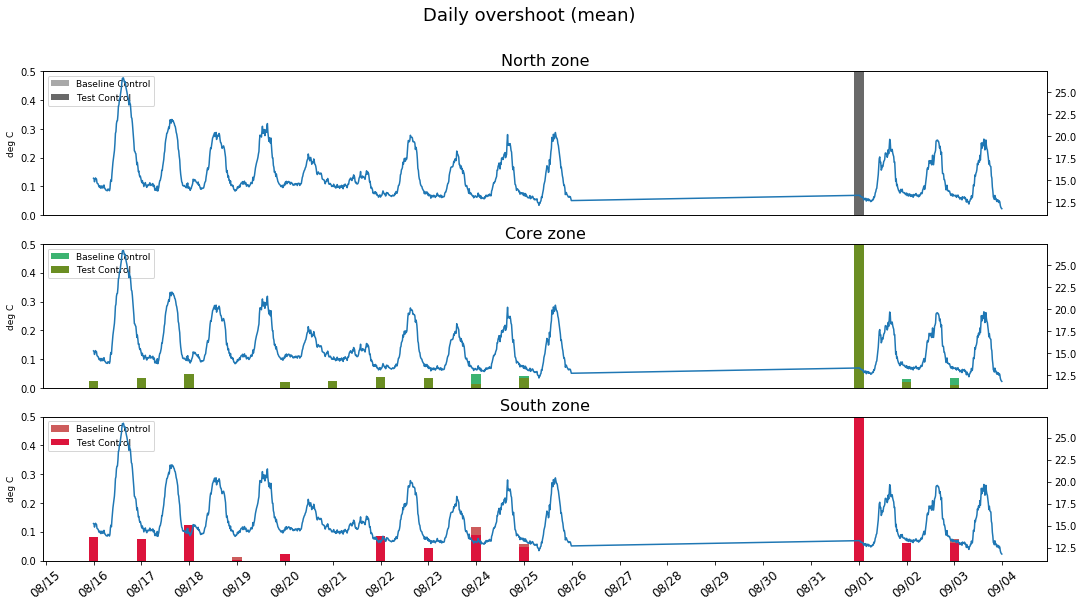

In [24]:
# key for metrics to be plotted in the scenario dictionary; {1:'overshoot', 2:'mean', 3:'median', 4:'std_dev'}
title_dict = {1: 'Daily overshoot (deg C hour)', 2:'Daily overshoot (mean)', 3:'Daily overshoot (median)' , 4:'Daily overshoot (standard deviation)'}
ylabel = {1: 'deg C - hour', 2: 'deg C', 3: 'deg C', 4: 'deg C'}
db_plotting.thermal_comfort_plot(data22, scenario_dict['data22']['nor'], scenario_dict['data23']['nor'], 
                                 scenario_dict['data22']['cor'], scenario_dict['data23']['cor'], 
                                 scenario_dict['data22']['sou'], scenario_dict['data23']['sou'],
                                 scenario_dict, 1, ylabel[2], title_dict[2])